# MATH2319 Course Project - Predicting the use of cannabis based on demographics and usage of legal addictive substances (alcohol, nicotine, caffeine, chocolate)

### Student name:  Oana-Madalina Ivanovici
### Student number: s3759621
### Group: 33

## Table of contents

This report contains the following sections:

* [Overview](#overview) - describes the dataset and the project goal and objectives
* [Data Preparation](#data_preparation) - outlines the data import and export from and to a file
* [Data Pre-processing](#data_preprocessing) - presents the data cleaning and preparation process
* [Data Exploration and Visualisation](#visualisation) - explores the dataset's features using graphs
* [Predictive Modelling](#modelling) - outlines the feature selection and ranking, the hyperparameter tuning for the three classifiers, the performance analysis and comparison of the classifiers, and a critique of the approach
* [Summary and Conclusions](#summary) - presents the conclusions and a brief summary of this report
* [Sources](#sources) - list of sources and references used

## Overview <a class="anchor" id="overview"></a>

### Data Source and Summary

This report is based on the "Drug consumption (quantified)" dataset [1], found on the UCI Machine Learning Repository. The dataset contains 1884 observations and 32 attributes regarding the consumption of 19 different drugs, some legal and others illegal. Each observation represents one participant in the survey, and it details the demographics of the person, together with the frequency with which they consume the 19 drugs. 

The 32 features present in the dataset are as follows:
* **ID**: the ID of participant
* **Age**: 18-24, 25-34, 35-44, 45-54, 55-64, 65+
* **Gender**: Female, Male
* **Education**: Left school before 16 years, Left school at 16 years, Left school at 17 years, Left school at 18 years, Some college or university (no certificate or degree), Professional certificate/ diploma, University degree, Masters degree, Doctorate degree 
* **Country**: Australia, Canada, New Zealand, Republic of Ireland, UK, USA, Other
* **Ethnicity**: Asian, Black, Mixed-Black/Asian, Mixed-White/Asian, Mixed-White/Black, White, Other
* **Nscore** (Neuroticism): discrete
* **Escore** (Extraversion): discrete
* **Oscore** (Openness): discrete
* **Ascore** (Agreeableness): discrete
* **Cscore** (Conscientiousness): discrete
* **Impulsive** (Impulsiveness): real
* **SS** (Sensation Seeing): real
* **Alcohol**: CL0 (Never Used), CL1 (Used over a Decade Ago), CL2 (Used in Last Decade), CL3 (Used in Last Year), CL4 (Used in Last Month), CL5 (Used in Last Week), CL6 (Used in Last Day)
* **Amphet** (Amphetamines): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Amyl** (Amyl Nitrite): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Benzos** (Benzodiazepine): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Caff** (Caffeine): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Cannabis**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Chocolate**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Coke** (Cocaine): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Crack**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Ecstasy**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Heroin**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Ketamine**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Legalh** (Legal Highs): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **LSD**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Meth** (Methamphetamine): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Mushrooms**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Nicotine**: CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **Semer** (Semeron): CL0, CL1, CL2, CL3, CL4, CL5, CL6
* **VSA** (Volatile Substance Abuse): CL0, CL1, CL2, CL3, CL4, CL5, CL6

### Project Goal and Objectives

The goal of this project is to train, test, and compare three different classifiers for predicting the consumption of Cannabis of a person. The target feature is the **Cannabis** column, which is a categorical variable with seven classes. However, for this project we will combine the seven classes into two main ones - "Non-User", containing classes CL0, CL1 and CL2, and "User", containing classes CL3, CL4, CL5 and CL6. Therefore, our project will be a binary classification problem, with the target feature (Cannabis) containing two classes - "User" and "Non-User".

To model the dataset and achieve the project's goal, the following objectives were set:
1. Find the seven most relevant features in the dataset and only utilise them 
2. Decide on three different classifiers
3. Fine-tune the classifiers' hyperparameters
4. Evaluate the performance of the classifiers, both in terms of cross-validation and on making predictions for unseen data

## Data Preparation <a class="anchor" id="data_preparation"></a>

The first steps of the analysis are to ensure Altair is configured properly and all relevant modules are imported. Afterwards, the data from the Drugs_consumption.csv file is loaded into a Pandas dataframe and all the numeric features are rounded up to 3 digits. The following output describes the shape of the dataframe, which contains 1884 observations and 32 features, and it presents the top 5 rows into a table.

In [1]:
#%%capture
#!pip install --upgrade altair
#!pip install vega vega_datasets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')
import warnings
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 

In [3]:
#column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
#drugs = pd.read_csv("drug_consumption.data", header = 0, names = column_names)
drugs = pd.read_csv("Drugs_consumption.csv", index_col=0)
drugs = drugs.round(5)
print(drugs.shape)
drugs.round(3).head()


(1884, 32)


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.079,-0.482,1.984,0.961,-0.317,-0.678,1.939,1.435,0.761,-0.143,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.498,-0.482,-0.059,0.961,-0.317,-0.467,0.805,-0.847,-1.621,-1.014,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.952,0.482,1.164,0.961,-0.317,-0.149,-0.806,-0.019,0.590,0.585,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.498,0.482,1.984,0.961,-0.317,0.735,-1.633,-0.452,-0.302,1.306,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.592,0.482,-1.228,0.249,-0.317,-0.678,-0.300,-1.555,2.040,1.631,-1.380,-1.549,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Data Pre-processing  <a class="anchor" id="data_preprocessing"></a>

Before any pre-processing begins, we must check that data types in our dataframe are as expected, based on the data source explanations. As observed in the table above and in the original data description ([1]), the demographic and score features have been quantified and converted from categorical into real-values, so the 'float' data type is correct. The features describing drug consumption are categorical, meaning the type 'object' is appropriate. Therefore, no data type conversions are necessary.

In [4]:
drugs.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caffeine      object
Cannabis      object
Chocolate     object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

### Replace categorical feature values 

To be able to plot meaningful and readable graphs, we will convert the demographic and score features from real-values to categorical values. Such conversions are performed based on the details in [1] which outlies the categorical meaning of each real-value. 

We will first convert the Age feature. As seen in the table below, taken from [1], the current real-values can be converted to their correspondent categorical values, shown in the Meaning column.

| Value | Meaning | Cases | Fraction |
|:-----:|:-------:|:-----:|:--------:|
| -0.95197 | 18-24 | 643 | 34.11% |
| -0.07854 | 25-34 | 481 | 25.52% |
| 0.49788 | 35-44 | 356 | 18.89% |
| 1.09449 | 45-54 | 294 | 15.60% |
| 1.82213 | 55-64 | 93 | 4.93% |
| 2.59171 | 65+ | 18 | 0.95% |

The following output describes the result of converting the values in the Age feature from real-values to categorical values. When comparing the output to the table above, it can be seen that the number of cases is preserved across the values *****, meaning the conversion has been successful.

***NOTE**: it seems that the actual dataset (csv file) contains one less observation than the data source description [1] claims. This observation appears to have the age equal to "35-44", gender equal to "Female", education equal to "Professional certificate/ diploma", country equal to "UK", and ethnicity equal to "Mixed-White/Asian". Therefore, the tables describing the numbers of cases will have one extra value in these categories than the output from the value_counts() function.

In [5]:
age_replacement = {float(-0.95197): '18-24', float(-0.07854): '25-34', float(0.49788): '35-44', float(1.09449): '45-54', float(1.82213): '55-64', float(2.59171): '65+'}
drugs['Age'] = drugs['Age'].replace(age_replacement)
drugs['Age'].value_counts()

18-24    643
25-34    481
35-44    355
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

Similar to the Age feature, the real-values in the Gender attribute are converted to their correspondent categorical meaning, as per the table below, taken from [1]. 

| Value | Meaning | Cases | Fraction |
|:-----:|:-------:|:-----:|:--------:|
| 0.48246 | Female | 942 | 49.97% |
| -0.48246 | Male | 943 | 50.03% |

The following output is the result of the conversion. Again, when comparing the output to the table above, it can be seen that the number of cases is preserved across the values *****, meaning the conversion has been successful.

In [6]:
gender_replacement = {float(-0.48246): 'Male', float(0.48246): 'Female'}
drugs['Gender'] = drugs['Gender'].replace(gender_replacement)
drugs['Gender'].value_counts()

Male      943
Female    941
Name: Gender, dtype: int64

The values in the Education feature are also converted to their correspondent categorical values, as per table below [1]. The output of the code shows that the conversion has been successful.

| Value | Meaning | Cases | Fraction |
|:-----:|:-------:|:-----:|:--------:|
| -2.43591 | Left school before 16 years | 28 | 1.49% |
| -1.73790 | Left school at 16 years | 99 | 5.25% |
| -1.43719 | Left school at 17 years | 30 | 1.59% |
| -1.22751 | Left school at 18 years | 100 | 5.31% |
| -0.61113 | Some college or university, no certificate or degree | 506 | 26.84% |
| -0.05921 | Professional certificate/ diploma | 270 | 14.32% |
| 0.45468 | University degree | 480 | 25.46% |
| 1.16365 | Masters degree | 283 | 15.01% |
| 1.98437 | Doctorate degree | 89 | 4.72% |

In [7]:
education_replacement = {float(-2.43591): 'Left school before 16', float(-1.73790): 'Left school at 16', float(-1.43719): 'Left school at 17', float(-1.22751): 'Left school at 18', float(-0.61113): 'College/University, no certificate/degree', float(-0.05921): 'Professional certificate/diploma', float(0.45468): 'University degree', float(1.16365): 'Masters degree', float(1.98437): 'Doctorate degree'}
drugs['Education'] = drugs['Education'].replace(education_replacement)
drugs['Education'].value_counts()

College/University, no certificate/degree    506
University degree                            480
Masters degree                               283
Professional certificate/diploma             269
Left school at 18                            100
Left school at 16                             99
Doctorate degree                              89
Left school at 17                             30
Left school before 16                         28
Name: Education, dtype: int64

The values in the Country feature are also converted to their correspondent categorical values, as per table below [1]. The output of the following code shows that the conversion has been successful.

| Value | Meaning | Cases | Fraction |
|:-----:|:-------:|:-----:|:--------:|
|-0.09765| Australia | 54 | 2.86% |
|0.24923| Canada | 87 | 4.62% |
|-0.46841| New Zealand | 5 | 0.27% |
|-0.28519| Other | 118 | 6.26% |
|0.21128| Republic of Ireland | 20 | 1.06% |
|0.96082| UK | 1044 | 55.38% |
|-0.57009| USA | 557 | 29.55% |

In [8]:
country_replacement = {float(-0.09765): 'Australia', float(0.24923): 'Canada', float(-0.46841): 'New Zealand', float(-0.28519): 'Other', float(0.21128): 'Ireland', float(0.96082): 'UK', float(-0.57009): 'USA'}
drugs['Country'] = drugs['Country'].replace(country_replacement)
drugs['Country'].value_counts()

UK             1043
USA             557
Other           118
Canada           87
Australia        54
Ireland          20
New Zealand       5
Name: Country, dtype: int64

The values in the Ethnicity feature are also converted to their correspondent categorical values, as per table below [1]. The output of the following code shows that the conversion has been successful.

| Value | Meaning | Cases | Fraction |
|:-----:|:-------:|:-----:|:--------:|
|-0.50212 | Asian | 26 | 1.38% |
|-1.10702 | Black | 33 | 1.75% |
|1.90725 | Mixed-Black/Asian | 3 | 0.16% |
|0.12600 | Mixed-White/Asian | 20 | 1.06% |
|-0.22166 | Mixed-White/Black | 20 | 1.06% |
|0.11440 | Other | 63 | 3.34% |
|-0.31685 | White | 1720 | 91.25% |

In [9]:
ethnicity_replacement = {float(-0.50212): 'Asian', float(-1.10702): 'Black', float(1.90725): 'Mixed-Black/Asian', float(0.12600): 'Mixed-White/Asian', float(-0.22166): 'Mixed-White/Black', float(0.11440): 'Other', float(-0.31685): 'White'}
drugs['Ethnicity'] = drugs['Ethnicity'].replace(ethnicity_replacement)
drugs['Ethnicity'].value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

Finally, we convert the values in the features Nscore, Escore, Oscore, Ascore and Cscore to their corresponding numerical values, as per the details in [1]. The tables have been omitted from this report due to their length. The features Impulsive and SS were kept as real-values because the data source description does not detail their actual numerical values, so it was assumed that they do not have corresponding numerical values.

In [10]:
nscore_replacement = {float(-3.46436): 12, float(-0.67825): 29, float(1.02119): 46, float(-3.15735): 13, float(-0.58016): 30, float(1.13281): 47, float(-2.75696): 14, float(-0.46725): 31, float(1.23461): 48, float(-2.52197): 15, float(-0.34799): 32, float(1.37297): 49, float(-2.42317): 16, float(-0.24649): 33, float(1.49158): 50, float(-2.34360): 17, float(-0.14882): 34, float(1.60383): 51, float(-2.21844): 18, float(-0.05188): 35, float(1.72012): 52, float(-2.05048): 19, float(0.04257): 36, float(1.83990): 53, float(-1.86962): 20, float(0.13606): 37, float(1.98437): 54, float(-1.69163): 21, float(0.22393): 38, float(2.12700): 55, float(-1.55078): 22, float(0.31287): 39, float(2.28554): 56, float(-1.43907): 23, float(0.41667): 40, float(2.46262): 57, float(-1.32828): 24, float(0.52135): 41, float(2.61139): 58, float(-1.19430): 25, float(0.62967): 42, float(2.82196): 59, float(-1.05308): 26, float(0.73545): 43, float(3.27393): 60, float(-0.92104): 27, float(0.82562): 44, float(-0.79151): 28, float(0.91093): 45}
drugs['Nscore'] = drugs['Nscore'].replace(nscore_replacement)

escore_replacement = {float(-3.27393): 16, float(-1.23177): 31, float(0.80523): 45, float(-3.00537): 18, float(-1.09207): 32, float(0.96248): 46, float(-2.72827): 19, float(-0.94779): 33, float(1.11406): 47, float(-2.53830): 20, float(-0.80615): 34 , float(1.28610): 48, float(-2.44904): 21, float(-0.69509): 35, float(1.45421): 49, float(-2.32338): 22, float(-0.57545): 36, float(1.58487): 50, float(-2.21069): 23, float(-0.43999): 37, float(1.74091): 51, float(-2.11437): 24, float(-0.30033): 38, float(1.93886): 52, float(-2.03972): 25, float(-0.15487): 39, float(2.12700): 53, float(-1.92173): 26, float(0.00332): 40, float(2.32338): 54, float(-1.76250): 27, float(0.16767): 41, float(2.57309): 55, float(-1.63340): 28, float(0.32197): 42, float(2.85950): 56, float(-1.50796): 29, float(0.47617): 43, float(3.00537): 58, float(-1.37639): 30, float(0.63779): 44, float(3.27393): 59}
drugs['Escore'] = drugs['Escore'].replace(escore_replacement)

oscore_replacement = {float(-3.27393): 24, float(-1.11902): 38, float(0.58331): 50, float(-2.85950): 26, float(-0.97631): 39, float(0.72330): 51, float(-2.63199): 28, float(-0.84732): 40, float(0.88309): 52, float(-2.39883): 29, float(-0.71727): 41, float(1.06238): 53, float(-2.21069): 30, float(-0.58331): 42, float(1.24033): 54, float(-2.09015): 31, float(-0.45174): 43, float(1.43533): 55, float(-1.97495): 32, float(-0.31776): 44, float(1.65653): 56, float(-1.82919): 33, float(-0.17779): 45, float(1.88511): 57, float(-1.68062): 34, float(-0.01928): 46, float(2.15324): 58, float(-1.55521): 35, float(0.14143): 47, float(2.44904): 59, float(-1.42424): 36, float(0.29338): 48, float(2.90161): 60, float(-1.27553): 37, float(0.44585): 49}
drugs['Oscore'] = drugs['Oscore'].replace(oscore_replacement)

ascore_replacement = {float(-3.46436): 12, float(-1.34289): 34, float(0.76096): 48, float(-3.15735): 16, float(-1.21213): 35, float(0.94156): 49, float(-3.00537): 18, float(-1.07533): 36, float(1.11406): 50, float(-2.90161): 23, float(-0.91699): 37, float(1.2861): 51, float(-2.78793): 24, float(-0.76096): 38, float(1.45039): 52, float(-2.70172): 25, float(-0.60633): 39, float(1.61108): 53, float(-2.53830): 26, float(-0.45321): 40, float(1.81866): 54, float(-2.35413): 27,float(-0.30172): 41, float(2.03972): 55, float(-2.21844): 28, float(-0.15487): 42, float(2.23427): 56, float(-2.07848): 29, float(-0.01729): 43, float(2.46262): 57, float(-1.92595): 30, float(0.13136): 44, float(2.75696): 58, float(-1.77200): 31, float(0.28783): 45, float(3.15735): 59, float(-1.62090): 32, float(0.43852): 46, float(3.46436): 60, float(-1.47955): 33, float(0.59042): 47}
drugs['Ascore'] = drugs['Ascore'].replace(ascore_replacement)

cscore_replacement = {float(-3.46436): 17, float(-1.25773): 32, float(0.58489): 46, float(-3.15735): 19, float(-1.13788): 33, float(0.7583): 47, float(-2.90161): 20, float(-1.01450): 34, float(0.93949): 48, float(-2.72827): 21, float(-0.89891): 35, float(1.13407): 49, float(-2.57309): 22, float(-0.78155): 36, float(1.30612): 50, float(-2.42317): 23, float(-0.65253): 37, float(1.46191): 51, float(-2.30408): 24, float(-0.52745): 38, float(1.63088): 52, float(-2.18109): 25, float(-0.40581): 39, float(1.81175): 53, float(-2.04506): 26, float(-0.27607): 40, float(2.04506): 54, float(-1.92173): 27, float(-0.14277): 41, float(2.33337): 55, float(-1.78169): 28, float(-0.00665): 42, float(2.63199): 56, float(-1.64101): 29, float(0.12331): 43, float(3.00537): 57, float(-1.51840): 30, float(0.25953): 44, float(3.46436): 59, float(-1.38502): 31, float(0.41594): 45}
drugs['Cscore'] = drugs['Cscore'].replace(cscore_replacement)


The following table presents a snippet of our data after the conversions have been performed.

In [11]:
drugs.round(3).head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,Male,Doctorate degree,UK,White,29.0,52.0,55.0,48.0,41.0,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,Male,Professional certificate/diploma,UK,White,31.0,45.0,40.0,32.0,34.0,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,Female,Masters degree,UK,White,34.0,34.0,46.0,47.0,46.0,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,Female,Doctorate degree,UK,White,43.0,28.0,43.0,41.0,50.0,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,Female,Left school at 18,Canada,White,29.0,38.0,35.0,55.0,52.0,-1.380,-1.549,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


### Summary statistics

The following table presents the summary statistics for the numerical features in the dataset. There appears to be no irregularity.

In [12]:
drugs.describe(include='number').round(3)

,ID,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1884.000,1884.000,1884.000,1884.000,1884.000,1884.000,1884.000,1884.000
mean,945.796,35.920,39.578,45.764,42.869,41.437,0.007,-0.003
std,544.878,9.138,6.773,6.581,6.438,6.968,0.955,0.964
min,2.000,12.000,16.000,24.000,12.000,17.000,-2.555,-2.078
25%,474.750,29.000,35.000,41.000,39.000,37.000,-0.711,-0.526
50%,946.500,36.000,40.000,46.000,43.000,42.000,-0.217,0.080
75%,1417.250,42.000,44.000,51.000,48.000,46.000,0.530,0.765
max,1888.000,60.000,59.000,60.000,60.000,59.000,2.902,1.922


The following table presents the summary statistics for the categorical features in the dataset. There appears to be no irregularities. It is interesting to observe that the most frequent value for the target feature (Cannabis column) appears to be CL6, which represents consumption in the last day, with 463 participants out of 1884 appearing to be consuming cannabis daily.

In [13]:
drugs.describe(include='object')

,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
unique,6,2,9,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7
top,18-24,Male,"College/University, no certificate/degree",UK,White,CL5,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
freq,643,943,506,1043,1720,758,976,1304,1000,1384,463,807,1037,1626,1020,1604,1489,1093,1068,1428,981,610,1876,1454


### Detecting outliers

In this section, we detected and removed numerical outliers. First, we converted the ID column to categorical type, to ensure that we do not attempt to remove any values from it. The z-score was calculated for all numeric variables using the stats package, and the rows containing outliers in the drugs dataframe were dropped. The following two outputs present the shape of the new dataframe and the summary statistics of numerical features after the outliers were removed. It appears as though 1884 - 1853 = 31 observations were dropped. Source of the code: [2].

In [14]:
drugs['ID'] = drugs['ID'].astype('category')
zscores = drugs.select_dtypes(include='number').apply(lambda column: np.abs(stats.zscore(column)) < 3).all(axis=1)
drugs.drop(drugs.index[~zscores], inplace=True)
print(drugs.shape)

(1853, 32)


In [15]:
drugs.describe().round(3)

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1853.000,1853.000,1853.000,1853.000,1853.000,1853.000,1853.000
mean,35.764,39.759,45.836,42.971,41.588,-0.005,-0.005
std,9.035,6.558,6.482,6.310,6.827,0.938,0.957
min,12.000,20.000,28.000,24.000,21.000,-2.555,-2.078
25%,29.000,35.000,41.000,39.000,37.000,-0.711,-0.526
50%,35.000,40.000,46.000,43.000,42.000,-0.217,0.080
75%,42.000,44.000,51.000,48.000,47.000,0.530,0.765
max,60.000,59.000,60.000,60.000,59.000,1.862,1.922


### Check for missing values

We also need to ensure there are no missing values present in the dataframe. The following output suggests that all values are filled.

In [16]:
drugs.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caffeine     0
Cannabis     0
Chocolate    0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### Dropping irrelevant features

Lastly, we need to exclude features from the dataframe that have no predictive power (i.e. ID-like columns) or that are irrelevant (constant features). As it can be observed from the output, the dataframe now has one less column, which was initially the ID column.

In [17]:
drugs = drugs.loc[:, drugs.nunique() != 1]
drugs = drugs.drop(columns='ID')
drugs.shape

(1853, 31)

The goal of this exploration is to predict the usage of Cannabis based on participants' consumption of legal "drugs". Therefore, illegal substances (e.g. Cocaine) or substances that require medical prescription to be obtained (e.g. Benzodiazepines) are removed from the dataframe, as they do not serve a purpose in our investigation. The following output (legal_drugs dataframe) contains participants' demographics and personality scores (which have not been changed), and the participants' consumption of Alcohol, Chocolate, Caffeine, Nicotine, and Cannabis. This dataframe will be used throughout this report.


In [18]:
legal_drugs = drugs.drop(columns=['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer', 'VSA'])
legal_drugs.sample(5)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caffeine,Cannabis,Chocolate,Nicotine
337,45-54,Female,Professional certificate/diploma,UK,White,34.0,38.0,42.0,49.0,47.0,-1.37983,-0.21575,CL5,CL3,CL0,CL5,CL0
207,35-44,Female,University degree,UK,White,37.0,40.0,45.0,41.0,42.0,0.52975,1.22470,CL4,CL6,CL6,CL5,CL6
369,35-44,Female,University degree,UK,White,46.0,54.0,56.0,34.0,45.0,1.29221,1.92173,CL5,CL6,CL2,CL6,CL6
1142,25-34,Male,Masters degree,USA,White,38.0,35.0,48.0,43.0,34.0,-0.71126,-1.18084,CL5,CL6,CL6,CL5,CL3
713,18-24,Male,"College/University, no certificate/degree",UK,White,35.0,29.0,37.0,39.0,28.0,1.29221,-0.84637,CL3,CL6,CL6,CL6,CL6


## Data Exploration and Visualisation  <a class="anchor" id="visualisation"></a>

This section explores the relationship between features using visualisation techniques.

### Univariate Visualisations

Let us first inspect the frequency of cannabis use, to get a better understanding of the frequency distribution of the different consumption categories. As it can be observed from the following graph, the categories CL0 (Never used) and CL6 (Used in the last day) seem to be the most popular ones.

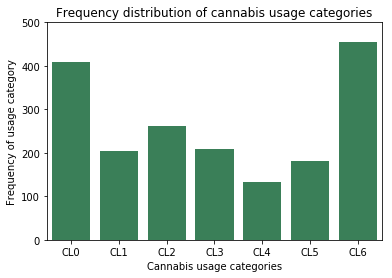

In [19]:
cannabis_categories = sns.countplot(x='Cannabis', data=legal_drugs, color="seagreen", order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
cannabis_categories.set_ylabel("Frequency of usage category")
cannabis_categories.set_xlabel("Cannabis usage categories")
cannabis_categories.set_title("Frequency distribution of cannabis usage categories")
cannabis_categories.set_yticks([0, 100, 200, 300, 400, 500])
cannabis_categories

Let us also have a look at the distribution of age categories, which is perhaps one of the most influential factors in the Cannabis consumption. As it can be observed from the graph below, the most popular age category for the participants is 18-24. It is perhaps worth asking ourselves if this could be the reason behind the daily usage of Cannabis.

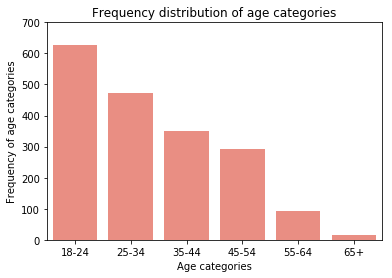

In [20]:
age_categories = sns.countplot(x="Age", data=legal_drugs, color="salmon", order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
age_categories.set_xlabel("Age categories")
age_categories.set_ylabel("Frequency of age categories")
age_categories.set_title("Frequency distribution of age categories")
age_categories.set_yticks([0, 100, 200, 300, 400, 500, 600, 700])
age_categories

### Bivariate Visualisations

Impulsivity has been shown to be associated with frequent marijuana use and higher age group [3]. Let us explore this association for our data, to investigate if the Age and Impulsive features could be two of the most important ones.

The first graph explores the relationship between Cannabis consumption and impulsivity. As it can be observed, higher consumption categories (CL3 Used in the last year - CL6 Used in the last day) seem to be associated with a higher impulsivity score.

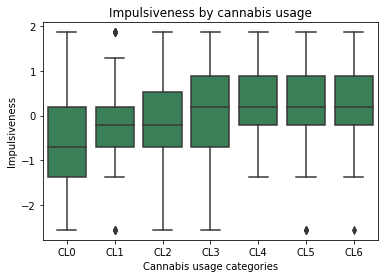

In [21]:
cannabis_impulsive = sns.boxplot(x="Cannabis", y="Impulsive", data=legal_drugs, color="seagreen", order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
cannabis_impulsive.set_ylabel("Impulsiveness")
cannabis_impulsive.set_xlabel("Cannabis usage categories")
cannabis_impulsive.set_title("Impulsiveness by cannabis usage")
cannabis_impulsive

The next graph investigates the relationship between impulsivity score and the age category. It can be observed that younger age groups such as 18-24 and 25-34 seem to have higher impulsivity score than older age groups. 

Both the above and below graphs suggest that impulsivity may be a relevant feature in the process of modelling the Cannabis consumption.

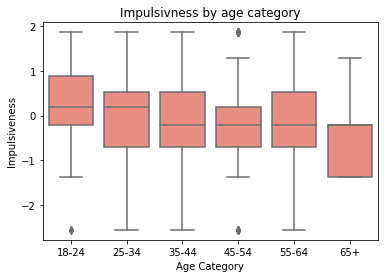

In [22]:
age_impulsive = sns.boxplot(x="Age", y="Impulsive", data=legal_drugs, color="salmon", order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+']);
age_impulsive.set_ylabel("Impulsiveness")
age_impulsive.set_xlabel("Age Category")
age_impulsive.set_title("Impulsivness by age category")
age_impulsive

It is also interesting to observe the following graph, where a higher impulsivity score seems to also be associated with higher alcohol consumption. It is worth asking ourselves if both substances (Alcohol and Cannabis) lead a person to become more impulsive. And if so, perhaps the impulsive score may not necessarily be a relevant feature for modelling our problem. 

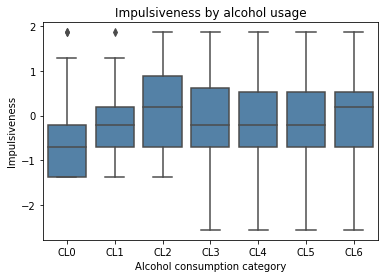

In [23]:
alcohol_impulsive = sns.boxplot(x="Alcohol", y="Impulsive", data=legal_drugs, color="steelblue", order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
alcohol_impulsive.set_ylabel("Impulsiveness")
alcohol_impulsive.set_xlabel("Alcohol consumption category")
alcohol_impulsive.set_title("Impulsiveness by alcohol usage")
alcohol_impulsive

### Trivariate Visualisations

The personality profile of high neuroticism, low agreeableness, and low conscientiousness was associated with addiction to alcohol, nicotine, cannabis [4]. To evaluate this association for our data, we need to filter the dataframe based on higher consumption categories. CL5 - CL6 represents usage in the last week to the last day, and consuming alchohol, nicotine every day and/or week might be a sign of addiction, so let us assume these categories of usage represent addiction. The filtered dataframe is addiction_data, which appears to have 1576 observations.


In [24]:
addiction_data = legal_drugs[(legal_drugs['Alcohol'].isin(["CL5", "CL6"])) | (legal_drugs['Nicotine'].isin(["CL5", "CL6"])) | (legal_drugs['Cannabis'].isin(["CL5", "CL6"]))]
addiction_data.shape

(1576, 17)

The following scatterplot shows the relationship between agreeableness on the y-axis and neuroticism on the x-axis, coloured by gender. It is interesting to observe that medium agreeableness and neuroticism varying from low to high seems to be associated the most with males, while high agreeableness and medium neuroticism appears to be associated the most with females.

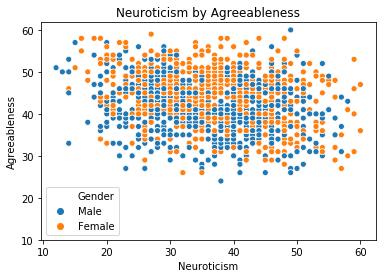

In [25]:
nscore_ascore = sns.scatterplot(x="Nscore", y="Ascore", hue="Gender", data=addiction_data)
nscore_ascore.set_yticks([10, 20, 30, 40, 50, 60])
nscore_ascore.set_xticks([10, 20, 30, 40, 50, 60])
nscore_ascore.set_ylabel("Agreeableness")
nscore_ascore.set_xlabel("Neuroticism")
nscore_ascore.set_title("Neuroticism by Agreeableness")
nscore_ascore.legend(loc="lower left")
nscore_ascore

Because consumption of alcohol and nicotine is more socially acceptable than consumption of Cannabis, the assumed addiction categories were CL5 and CL6. However, CL4 category represents drug usage in the last month, and for Cannabis, this frequency might also be considered as an addictive behaviour. So let us investigate the usage of cannabis for categories CL4 (usage in the last month) - CL6 (usage in the last day), and its impact on neuroticism, by gender.

The following graph seems to suggest that a higher Cannabis consumption category does not increase the neuroticism median in males, and that it increases the neuroticism median in females only by a small amount. This is an interesting behaviour, compared to what is suggested in [4].

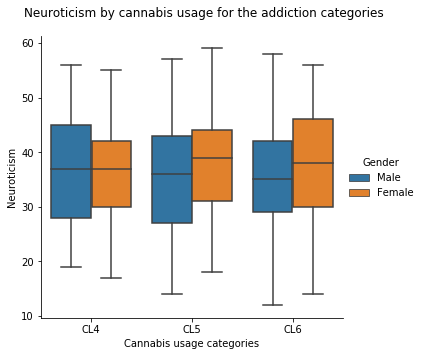

In [26]:
cannabis_addiction = legal_drugs[(legal_drugs['Cannabis'].isin(["CL4", "CL5", "CL6"]))]
cannabis_nscore = sns.catplot(x="Cannabis", y="Nscore", hue="Gender", kind="box", data=cannabis_addiction, order=['CL4', 'CL5', 'CL6'])
cannabis_nscore.set_xlabels("Cannabis usage categories")
cannabis_nscore.set_ylabels("Neuroticism")
plt.subplots_adjust(top=0.90)
cannabis_nscore.fig.suptitle("Neuroticism by cannabis usage for the addiction categories")
cannabis_nscore

Let us also investigate the relationship between Cannabis consumption and agreeableness score, by gender. The following graph would suggest that agreeableness in males does not change with an increase in Cannabis consumption, but the agreeableness of females seems to increase by a significant factor between the monthly and weekly consumption categories (CL4 and CL5). This is again an interesting phenomenon, unlike what is suggested in [4].

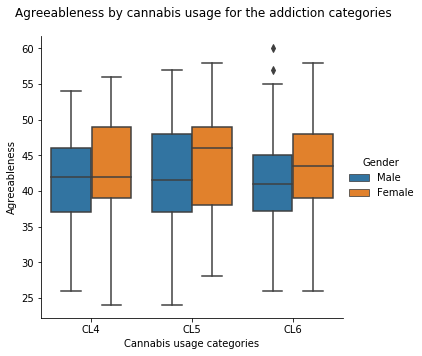

In [27]:
cannabis_ascore = sns.catplot(x="Cannabis", y="Ascore", hue="Gender", kind="box", data=cannabis_addiction, order=['CL4', 'CL5', 'CL6'])
cannabis_ascore.set_xlabels("Cannabis usage categories")
cannabis_ascore.set_ylabels("Agreeableness")
plt.subplots_adjust(top=0.90)
cannabis_ascore.fig.suptitle("Agreeableness by cannabis usage for the addiction categories")
cannabis_ascore


## Predictive Modelling  <a class="anchor" id="modelling"></a>

### Methodology

To model the data, we consider the following three binary classifiers:
* K-Nearest Neighbours
* Naive Bayes
* Random Forest

Before fitting the classifiers with the data, a few further preparatory steps must be taken. First, we need to isolate the target feature from the remaining features and perform one-hot encoding for nominal features and integer encoding for ordinal features and the target feature. After all the categorical features have been encoded to numeric features, all numerical values must be scaled using the Min-Max Scaler.

Following the preparation of data, feature selection and ranking using the F-score is performed, in order to find the seven most important features in predicting the target feature. The top ranked features are be visualised using a bar chart, where the y-axis value represents the importance scores.

The next step is to define the testing and evaluation processes. For the testing process, the data is split in training and test sets with a 70:30 ratio. For the validation process, 5-fold stratified cross-validation will be used with three repetitions. The training data is used for hyperparameter tuning, while the test data is used to compare the performance of the classifiers.

Each of the three classifiers has its hyperparameters fine-tuned using grid search, with recall as the performance metric, and the cross-validation method mentioned above. A graph is plotted for each classifier, showing the performance of each set of parameters.

After the best hyperparameters for each classifier are found, each classifier is fit with the test data using a 5-fold stratified cross-validation with no repetitions and the area under the ROC as the metric. The performance is compared against the other two classifiers. Paired t-tests are performed for each combination of two classifiers to investigate if the results of the classifiers are statistically significant.

Lastly, to make predictions with the tuned classifiers, a series of confusion matrices and classification reports are presented, together with a visualisation of a ROC curve detailing the False Positive Rates and True Positive Rates.

This section is concluded with a critique of our methodology, presenting its assumptions, limitations, weaknesses and strengths.

### Encoding

Before performing one-hot encoding, we join the seven consumption categories into two classes, to ensure this modelling is a binary classification. As per suggestions in [1], categories CL0, CL1, and CL2 will be joined into category "Non-user", while categories CL3, CL4, CL5, and CL6 will be joined into category "User".

In [28]:
joined_consumption_categories = legal_drugs.copy()
usage_categories = {'CL0': 'Non-user', 'CL1': 'Non-user', 'CL2': 'Non-user', 'CL3': 'User', 'CL4': 'User', 'CL5': 'User', 'CL6': 'User'}
usage_columns = ['Alcohol', 'Caffeine', 'Cannabis', 'Chocolate', 'Nicotine']

for col in usage_columns:
    joined_consumption_categories[col] = joined_consumption_categories[col].replace(usage_categories)    

joined_consumption_categories.sample(5)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caffeine,Cannabis,Chocolate,Nicotine
1706,35-44,Female,Left school at 18,UK,White,28.0,34.0,51.0,37.0,44.0,-0.71126,-0.21575,User,User,Non-user,User,Non-user
886,18-24,Female,"College/University, no certificate/degree",USA,White,40.0,45.0,54.0,50.0,46.0,-0.71126,0.07987,User,User,User,User,Non-user
31,35-44,Male,University degree,UK,White,28.0,31.0,46.0,46.0,42.0,0.19268,-0.84637,User,User,User,User,User
1487,18-24,Female,Masters degree,UK,White,35.0,47.0,36.0,40.0,36.0,0.88113,1.22470,User,User,Non-user,User,Non-user
1181,45-54,Male,Left school at 16,USA,White,34.0,31.0,45.0,49.0,44.0,-0.21712,0.76540,User,User,User,User,Non-user


The first step is to rename the Cannabis column as the target feature and separate it from the remaining features. Then, we perform one-hot encoding for nominal features (gender, country, ethnicity), and integer encoding for ordinal features (age, education, alcohol, caffeine, chocolate, nicotine). The results are stored in legal_drugs_enc dataframe. The integer encoding and one-hot encoding are performed as demonstrated in the tutorial "Data Preparation for Statistical Modeling and Machine Learning" [5].

In [29]:
legal_drugs_enc = joined_consumption_categories.copy()
legal_drugs_enc = legal_drugs_enc.rename(columns={"Cannabis": "target"})
target = legal_drugs_enc['target']
legal_drugs_enc = legal_drugs_enc.drop(columns='target')

In [30]:
# integer encoding
age_mapping = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65+': 5}
legal_drugs_enc['Age'] = legal_drugs_enc['Age'].replace(age_mapping)
education_mapping = {'Left school before 16': 0, 'Left school at 16': 1, 'Left school at 17': 2, 'Left school at 18': 3, 'College/University, no certificate/degree': 4, 'Professional certificate/diploma': 5, 'University degree': 6, 'Masters degree': 7, 'Doctorate degree': 8}
legal_drugs_enc['Education'] = legal_drugs_enc['Education'].replace(education_mapping)

In [31]:
# one-hot encoding
nominal_cols = legal_drugs_enc.columns[legal_drugs_enc.dtypes==object].tolist()

for column in nominal_cols:
    if (len(legal_drugs_enc[column].unique()) == 2):
        legal_drugs_enc[column] = pd.get_dummies(legal_drugs_enc[column], drop_first=True)
        
legal_drugs_enc = pd.get_dummies(legal_drugs_enc)

The following output presents the encoded values.

In [32]:
legal_drugs_enc.sample(5)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caffeine,Chocolate,Nicotine,Country_Australia,Country_Canada,Country_Ireland,Country_New Zealand,Country_Other,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
791,0,1,4,47.0,36.0,44.0,39.0,49.0,-0.71126,-0.21575,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
911,0,0,4,25.0,54.0,54.0,49.0,48.0,0.19268,0.76540,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1775,3,1,4,33.0,40.0,48.0,45.0,40.0,0.88113,1.22470,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
717,2,1,4,48.0,45.0,52.0,42.0,49.0,0.88113,0.76540,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1121,1,1,3,26.0,40.0,29.0,46.0,42.0,1.29221,0.07987,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Lastly, we encode the target feature, where 0 represents 'Non-user' and 1 represents our positive class, 'User'.

In [33]:
target.value_counts()

User        978
Non-user    875
Name: target, dtype: int64

In [34]:
# encode the target feature
target = preprocessing.LabelEncoder().fit_transform(target)
np.unique(target, return_counts = True)

(array([0, 1]), array([875, 978]))

### Scaling

Our data is scaled using a Min-Max Scaler to ensure the values are between 0 and 1. A copy of our dataframe is maintaned within Data_with_cols, so we can have access to column names. The following output shows the encoded and scaled values.

In [35]:
Data_with_cols = legal_drugs_enc.copy()
Data = preprocessing.MinMaxScaler().fit_transform(legal_drugs_enc)

In [36]:
pd.DataFrame(Data, columns=Data_with_cols.columns).sample(5).round(3)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caffeine,Chocolate,Nicotine,Country_Australia,Country_Canada,Country_Ireland,Country_New Zealand,Country_Other,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
854,0.0,0.0,0.50,0.479,0.718,0.844,0.667,0.868,0.698,0.826,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.2,1.0,1.00,0.354,0.821,0.844,0.667,0.526,0.417,0.466,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1377,0.0,0.0,0.75,0.083,0.538,0.156,0.944,0.368,0.000,0.308,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1268,0.0,1.0,0.50,0.500,0.410,0.812,0.667,0.316,0.417,0.711,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
608,0.6,0.0,0.50,0.708,0.538,0.531,0.417,0.342,0.871,0.826,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature selection and ranking

To perform feature selection and ranking, we use the F-Score and the SelectKBest function and plot the results as per tutorial "SK Part 2: Feature Selection and Ranking" [6]. It is important to select the most relevant features to ensure the fine-tuning process is sped up. We retrieve the top seven most relevant features, together with their importance score, and combine our findings in the following dataframe. To visualise the results, the graph below is produced. Lastly, we select the top 7 features in the data to use this result in the remaining of the modelling process.

In [37]:
number_features = 7
top_features_fscore = SelectKBest(k=number_features)
top_features_fscore.fit_transform(Data, target)
top_features_index = np.argsort(np.nan_to_num(top_features_fscore.scores_))[::-1][0:number_features]
top_features_names = legal_drugs_enc.columns[top_features_index].values
top_feature_importance = top_features_fscore.scores_[top_features_index]
df_top_features = pd.DataFrame(list(zip(top_features_names, top_feature_importance)), columns=['Name', 'Importance'])
df_top_features

,Name,Importance
0,Country_UK,705.162570
1,Nicotine,685.046993
2,Country_USA,462.741672
3,SS,458.500012
4,Age,433.068039
5,Oscore,350.879171
6,Impulsive,168.683462


As it can be observed from the following graph, the consumption of Nicotine and living in the UK and USA seem to be the most relevant features in predicting the consumption of Cannabis.

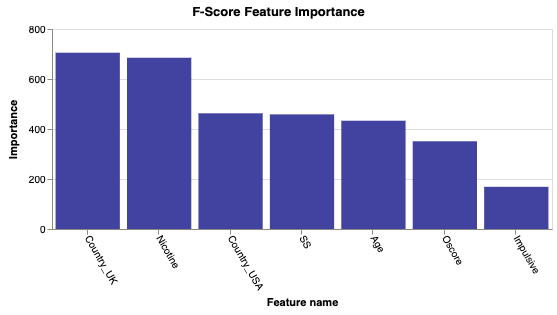

In [38]:
importance_chart = alt.Chart(df_top_features, width=500, title="F-Score Feature Importance").mark_bar(color='#4242a1').encode(
    alt.X('Name', title='Feature name', sort=None, axis=alt.AxisConfig(labelAngle=60)),
    alt.Y('Importance', title='Importance')
)
importance_chart

In [39]:
Data_top_features = Data[:, top_features_index]
print(Data_top_features.shape)
print(Data.shape)

(1853, 7)
(1853, 28)


### Test and evaluation approaches

To split the dataset into training data (used for fine-tuning) and test data (used for performance comparison), we first need to ensure the data we pass to the Scikit-Learn modules are of type NumPy arrays. Afterwards, we use the train_test_split function and output the shape of the resulting sets, to ensure the split was performed correctly.

In [40]:
print(type(Data_top_features), type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [41]:
D_train, D_test, t_train, t_test = train_test_split(Data_top_features, target, test_size = 0.3, stratify=target, 
                                                    shuffle=True, random_state=999)

print(D_train.shape)
print(D_test.shape)


(1297, 7)
(556, 7)


The cross-validation technique used during fine-tuning is 5-fold stratified cross-validation with 3 repetitions, resulting in 15 runs for each hyperparameter combination.

In [42]:
splits = 5
repeats = 3
cv_method = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=999)


### Algorithms’ tuning process

As disussed above, the three classifiers used for our prediction will be 
* K-Nearest Neighbours
* Naive Bayes
* Random Forest Classifier

We use recall as a scoring metric because we are interested in the proportion of true positives that are correctly identified.

In [43]:
scoring_metric = 'recall'

#### K-Nearest Neighbours

The following KNN tuning and graph have been produced using the material from tutorial "SK Part 3: Cross-Validation and Hyperparameter Tuning" [3]. To fine-tune the hyperparameters of the KNN classifier, we consider the set {1, 5, 10, 15, 20, 25} as the set of potential number of **n-neighbours**, and the set {1, 2, 3} as the set of potential distance metric **p** (i.e. Manhattan, Euclidian, and Minkowski).

The parameters are exhaustively iterated through using GridSearchCV, with the 5-fold stratified cross-validation with 3 repetitions, and recall as the performance metric. We fit the training set to the Grid Search and obtain the best parameters and corresponding recall score for the KNN classifier. As the output below shows, the best parameters for KNN are **n-neighbours = 25** and **p = 1** (Manhattan). 

In [44]:
params_knn = {'n_neighbors': [1, 5, 10, 15, 20, 25], 
              'p': [1, 2, 3]}

gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_knn, 
                      cv=cv_method, 
                      verbose=1, 
                      n_jobs=-2,
                      scoring=scoring_metric, 
                      return_train_score=True)

gs_knn.fit(D_train, t_train);

print("Best parameters: ", gs_knn.best_params_)
print("Best score: ", gs_knn.best_score_)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:  {'n_neighbors': 25, 'p': 1}
Best score:  0.8715302204038142


[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:   27.3s finished


To get a better understanding of how the performance of the classifier varies with the different parameters, let us have a look at the following dataframe and graph, which present the cross-validation score for each combination of parameters. As it can be observed, the performance score varies between 0.789 and 0.871.

In [45]:
results_knn = pd.DataFrame(gs_knn.cv_results_['params'])
results_knn['metric'] = results_knn['p'].replace([1,2,3], ["Manhattan", "Euclidean", "Minkowski"])
results_knn['mean_test_score'] = gs_knn.cv_results_['mean_test_score']
results_knn.round(3)

,n_neighbors,p,metric,mean_test_score
0,1,1,Manhattan,0.789
1,1,2,Euclidean,0.800
2,1,3,Minkowski,0.807
3,5,1,Manhattan,0.841
4,5,2,Euclidean,0.838
5,5,3,Minkowski,0.840
6,10,1,Manhattan,0.841
7,10,2,Euclidean,0.839
8,10,3,Minkowski,0.840
9,15,1,Manhattan,0.864


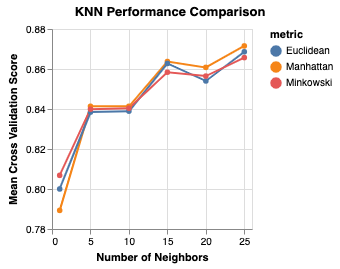

In [46]:
knn_performance = alt.Chart(results_knn, title='KNN Performance Comparison').mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_test_score', title='Mean Cross Validation Score', scale=alt.Scale(zero=False)),
    color='metric'
).interactive()

knn_performance

The KNN Performance graph outlines that the metrics have fairly similar performance when K (n-neighbours) is larger than 5, and that the cross-validation score does not appear to vary a significant amount for 15 < K < 25.

#### Naive Bayes

The following Naive Bayes tuning and graph have been produced using the material from tutorial "SK Part 3: Cross-Validation and Hyperparameter Tuning" [3]. To fine-tune the Naive Bayes classifier, we consider the **variance smoothing** parameter as 100 generated numbers between $10^0$ and $10^{-9}$ (which is the default value). 

The parameters are exhaustively iterated through using GridSearchCV, with the 5-fold stratified cross-validation with 3 repetitions, and recall as the performance metric. We fit the training set, on which we perform a power transformation, to the Grid Search and obtain the best parameters and corresponding recall score for the Naive Bayes classifier. As the output below shows, the best parameter for Naive Bayes is **var_smoothing = 0.187**.

In [47]:
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_nb = GridSearchCV(estimator=GaussianNB(), 
                      param_grid=params_nb, 
                      cv=cv_method, 
                      verbose=1, 
                      n_jobs=-2,
                      scoring=scoring_metric, 
                      return_train_score=True)

D_train_transformed = preprocessing.PowerTransformer().fit_transform(D_train)

gs_nb.fit(D_train_transformed, t_train);

print("Best parameters: ", gs_nb.best_params_)
print("Best score: ", gs_nb.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:  {'var_smoothing': 0.1873817422860384}
Best score:  0.8287044592893578


[Parallel(n_jobs=-2)]: Done 1500 out of 1500 | elapsed:    9.6s finished


To get a better understanding of how the performance of the classifier varies with the different var_smoothing parameter, let us have a look at the following dataframe and graph, which present the cross-validation score for each of the 100 generated var_smoothing. As it can be observed, the performance score varies between 0.824 and 0.829.

Note the numbers have been rounded up to 3 digits, and the last few rows of the dataframe do not contain the var_smoothing value equal to 0, but rather the value is so small it has been rounded up to 0.

In [48]:
results_nb = pd.DataFrame(gs_nb.cv_results_['params'])
results_nb['mean_test_score'] = gs_nb.cv_results_['mean_test_score']
results_nb.round(3)


,var_smoothing,mean_test_score
0,1.000,0.828
1,0.811,0.826
2,0.658,0.825
3,0.534,0.825
4,0.433,0.826
...,...,...
95,0.000,0.826
96,0.000,0.826
97,0.000,0.826
98,0.000,0.826


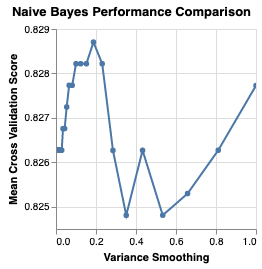

In [49]:
nb_performance = alt.Chart(results_nb, title='Naive Bayes Performance Comparison').mark_line(point=True).encode(
    alt.X('var_smoothing', title='Variance Smoothing'),
    alt.Y('mean_test_score', title='Mean Cross Validation Score', scale=alt.Scale(zero=False)),
).interactive()

nb_performance

The Naive Bayes performance graph seems to suggest that the difference in performance score caused by the varying var_smoothing parameters is not significantly large.

#### Random Forest Classifier

The following tuning and graph plotting are performed using the material from practical "Week 9: SK3. Cross-Validation and Hyperparameter Tuning" (please note an appropriate reference could not be provided as the material is present on Canvas only, and not on a publicly accessible webpage). To fine-tune the Random Forest classifier, we consider the set {100, 200, 300, 400} as the set of potential number of **estimators** (number of trees in the forest), and the set {3, 5, 7, 9} as the set of potential **maximum depth** (of a tree).

The parameters are exhaustively iterated through using GridSearchCV, with the 5-fold stratified cross-validation with 3 repetitions, and recall as the performance metric. We fit the training set and obtain the best parameters and corresponding recall score for the Random Forest classifier. As the output below shows, the best parameters for Random Forest are **max_depth = 3** and **n_estimators = 300**.

In [50]:
params_rf = {'n_estimators': [100, 200, 300, 400],
             'max_depth': [3, 5, 7, 9]}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=999), 
                     param_grid=params_rf, 
                     cv=cv_method, 
                     verbose=1, 
                     n_jobs=-2,
                     scoring=scoring_metric,
                     return_train_score=True)

gs_rf.fit(D_train, t_train);

print("Best parameters: ", gs_rf.best_params_)
print("Best score: ", gs_rf.best_score_)

Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 240 out of 240 | elapsed:  2.9min finished


Best parameters:  {'max_depth': 3, 'n_estimators': 300}
Best score:  0.8671367764277287


To get a better understanding of how the performance of the classifier varies with the different parameters, let us have a look at the following dataframe and graph, which present the cross-validation score for each combination of parameters. As it can be observed, the performance score varies between 0.848 and 0.867.

In [51]:
results_rf = pd.DataFrame(gs_rf.cv_results_['params'])
results_rf['mean_test_score'] = gs_rf.cv_results_['mean_test_score']
results_rf.round(3)

,max_depth,n_estimators,mean_test_score
0,3,100,0.863
1,3,200,0.864
2,3,300,0.867
3,3,400,0.866
4,5,100,0.860
5,5,200,0.860
6,5,300,0.860
7,5,400,0.860
8,7,100,0.855
9,7,200,0.857


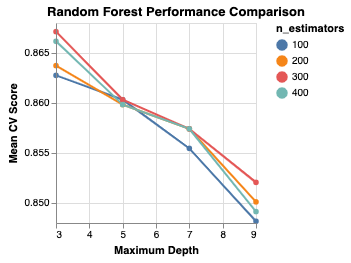

In [52]:
rf_performance = alt.Chart(results_rf, title='Random Forest Performance Comparison').mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('mean_test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='n_estimators:N'
)

rf_performance

The Random Forest performance graph seems to suggest that different number of estimators do not lead to a significant increase or decrease in performance score. On the other hand, as the depth of each tree increases, the score seems to decrease.

### Performance analysis and comparison of the algorithms

In this section, we fit the fine-tuned classifiers with the test data (i.e. 30% of our original dataset), to evaluate and compare which classifier performed best on unseen data. We will also perform t-tests for each combination of two classifiers to investigate if the results are statisfically significant. For this section, we used material from practical "Week 9: SK3. Cross-Validation and Hyperparameter Tuning" (please note an appropriate reference could not be provided as the material is present on Canvas only, and not on a publicly accessible webpage).

#### Comparison of classifiers

To compare the fine-tuned classifiers, we need to calculate the cross-validation results for each algorithm using the calculate_cv_results function. When calculating the results for Naive Bayes, we first perform a power transformation on the test data. Otherwise, the test data remains the same for KNN and Random Forest. We pass the test data to the best estimator of each classifier using a 5-fold stratified cross-validation with no repetitions and the same random seed of 999 to ensure the same data partition, and the area under the ROC as the performance metric. Depending on whether we want to calculate the mean cross-validation result to present it in a dataframe, or we want to calculate all the cross-validation results of a classifier for the t-test, we pass a parameter to the function to signal our preference. The following dataframe presents the cross-validation results of the three classifiers, with their best parameters, when fit with the unseen test data.

In [53]:
test_scoring_metric = 'roc_auc'
test_splits = 5
test_cv_method = StratifiedKFold(n_splits=test_splits, random_state=999, shuffle=True)

def calculate_cv_results(gs_estimator, results_type):
    if (gs_estimator == gs_nb):
        D_test_transformed = preprocessing.PowerTransformer().fit_transform(D_test)
        cv_results_classifier = cross_val_score(estimator=gs_estimator.best_estimator_, X=D_test_transformed, y=t_test, 
                                            cv=test_cv_method, scoring=test_scoring_metric)
    else:
        cv_results_classifier = cross_val_score(estimator=gs_estimator.best_estimator_, X=D_test, y=t_test, 
                                            cv=test_cv_method, scoring=test_scoring_metric)
    
    if results_type == "mean":
        return cv_results_classifier.mean()
    elif results_type == "full":
        return cv_results_classifier
    

results_comparison = pd.DataFrame(["KNN", "Naive Bayes", "Random Forest"], columns=["Classifier"])
results_comparison["Mean Cross Validation"]  = [calculate_cv_results(gs_knn, "mean"), 
                                                calculate_cv_results(gs_nb, "mean"), 
                                                calculate_cv_results(gs_rf, "mean")]
results_comparison.round(3)


,Classifier,Mean Cross Validation
0,KNN,0.885
1,Naive Bayes,0.887
2,Random Forest,0.889


Random Forest seems to have performed the best. Let us now perform a t-test for each combination of two classifiers. We will consider Naive Bayes - KNN, Naive Bayes - Random Forest, and Random Forest - KNN. We utilise the stats.ttest_rel function to calculate the p-value and the calculate_cv_results function to retrieve all the cross-validation ROC reults for each tuned classifier.

In [54]:
# t-test
print(stats.ttest_rel(calculate_cv_results(gs_nb, "full"), calculate_cv_results(gs_knn, "full")).pvalue.round(3))
print(stats.ttest_rel(calculate_cv_results(gs_nb, "full"), calculate_cv_results(gs_rf, "full")).pvalue.round(3))
print(stats.ttest_rel(calculate_cv_results(gs_knn, "full"), calculate_cv_results(gs_rf, "full")).pvalue.round(3))


0.857
0.499
0.483


As it can be observed, all p-values are above the 0.05 threshold. Therefore, at 95% confidence level, the difference in performance of the three classifiers is not statistically significant. This means that even though Random Forest performed slightly better, all three classifiers have comparable performance.

#### Predictions & Evaluations of classifiers

To make predictions with the tuned classifiers, and investigate other performance metrics, a series of confusion matrices and classification reports are presented, together with a visualisation of a ROC curve detailing the False Positive Rates and True Positive Rates. The following predictions and metrics calculation were performed as seen in the tutorial "Case Study: Predicting Income Status" [8]. It can be observed from the confusion matrices and the classification reports that the performance of the three classifiers does not appear to vary drastically. 

In [55]:
knn_pred = gs_knn.best_estimator_.predict(D_test)
rf_pred = gs_rf.best_estimator_.predict(D_test)
D_test_transformed = preprocessing.PowerTransformer().fit_transform(D_test)
nb_pred = gs_nb.best_estimator_.predict(D_test_transformed)

In [56]:
print("Confusion matrix of K-Nearest Neighbours")
print(metrics.confusion_matrix(y_true=t_test, y_pred=knn_pred))
print("Confusion matrix of Random Forest")
print(metrics.confusion_matrix(y_true=t_test, y_pred=rf_pred))
print("Confusion matrix of Naive Bayes")
print(metrics.confusion_matrix(y_true=t_test, y_pred=nb_pred))

Confusion matrix of K-Nearest Neighbours
[[206  57]
 [ 41 252]]
Confusion matrix of Random Forest
[[207  56]
 [ 46 247]]
Confusion matrix of Naive Bayes
[[223  40]
 [ 57 236]]


In [57]:
print("Classification report of K-Nearest Neighbors") 
print(metrics.classification_report(y_true=t_test, y_pred=knn_pred))
print("Classification report of Random Forest") 
print(metrics.classification_report(y_true=t_test, y_pred=rf_pred))
print("Classification report of Naive Bayes") 
print(metrics.classification_report(y_true=t_test, y_pred=nb_pred))

Classification report of K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       263
           1       0.82      0.86      0.84       293

   micro avg       0.82      0.82      0.82       556
   macro avg       0.82      0.82      0.82       556
weighted avg       0.82      0.82      0.82       556

Classification report of Random Forest
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       263
           1       0.82      0.84      0.83       293

   micro avg       0.82      0.82      0.82       556
   macro avg       0.82      0.82      0.82       556
weighted avg       0.82      0.82      0.82       556

Classification report of Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       263
           1       0.86      0.81      0.83       293

   micro avg       0.83      0.83      0.83       556
   macr

To investigate the change in False Positive Rate and True Positive Rate, the following evaluation is performed for the Random Forest, as demonstrated in practical "Week 10: SK4. Model Evaluation" and tutorial "SK Part 4: Model Evaluation" [9].

In [58]:
t_prob = gs_rf.predict_proba(D_test_transformed)
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc_df.head()

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.010239
2,0.003802,0.034130
3,0.003802,0.037543
4,0.003802,0.047782


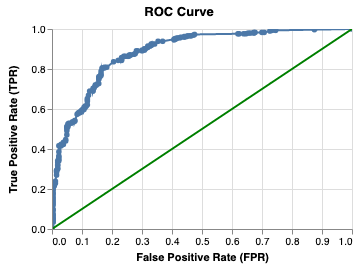

In [59]:
base = alt.Chart(roc_df, title='ROC Curve').properties(width=300)

roc_curve = base.mark_line(point=True).encode(
    alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr', title='True Positive Rate (TPR)'),
)

roc_rule = base.mark_line(color='green').encode(
    x='fpr',
    y='fpr',
    size=alt.value(2)
)

(roc_curve + roc_rule).interactive()

### Critiquing the approach

One of the major limitations of our approach is that we assumed seven features would be a good amount to select in the feature ranking process. Although our classifiers performed adequately, this assumption may not hold in all scenarios. In the future, it would be sensible to include the feature selection process as part of a pipeline, together with the classifier we want to fine-tune. We could therefore perform a Grid Search over several numbers of features and find out which one would be the most appropriate to the classifier in the pipeline (as seen in [8]).

Another limitation is the limited set of hyperparameters considered for the fine-tuning of each classifier. Again, despite our classifiers performing adequately, the reason for choosing our parameters was simply trial and error. In the future, it would be wise to further investigate the choice of hyperparameter sets given to the Grid Search.

Initially, the target feature had seven classes, but we merged them into two classes to be able to perform a binary classification. For future experiments, it would be interesting to investigate the performance of the same classifiers for a multilabel classification and evaluate any variance in their performance. If the classifiers were to perform better in a multilabel classification, the class merge may have been a limitation of our approach. On the other hand, if the classifiers performed worse, the class merge may be a strength of the approach we took.

## Summary and Conclusions  <a class="anchor" id="summary"></a>

In this project, we attempted to predict the consumption of Cannabis (i.e. if a person is a user of the drug or not) based on demographics, personality scores, and consumption of other legal drugs. We visualised the relationships between features such as age, impulsivity, cannabis and alcohol consumption, agreeableness and neuroticism. We investigated the usage of K-Nearest Neighbours, Naive Bayes, and Random Forest as three classifiers for our binary classification task, and fulfilled objective 2. Seven features were selected based on their importance and used in the process of fine-tuning the classifiers and evaluating the performance of the tuned ones. This achieved objectives 1 and 3. After performing t-tests on the results obtained by tuned classifiers, we have reasoned that, at 95% confidence level, the difference in performance of the three classifiers is not statistically significant, and that all three have comparable performance, thereby achieving objective 4. 

To summarise our findings, during fine-tuning and in terms of recall, we found that KNN seemed to have performed best with a score of 0.872, followed by Random Forest with a score of 0.867, and Naive Bayes with 0.829. On the other hand, during testing in a cross-validation manner and in terms of ROC, we found that Random Forest performed best with the score of 0.889, followed by Naive Bayes with 0.887 and KNN with 0.885.

## Sources  <a class="anchor" id="sources"></a>

*  [1] E. Fehrman, V. Egan and E. Mirkes, "UCI Machine Learning Repository: Drug consumption (quantified) Data Set", Archive.ics.uci.edu, 2016. [Online]. Available: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. [Accessed: 18- May- 2020]. 
* [2] "Detect and exclude outliers in Pandas data frame", Stack Overflow, 2014. [Online]. Available: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame. [Accessed: 21- May- 2020].
* [3] A. Lee-Winn, T. Mendelson and R. Johnson, "Associations of personality traits with marijuana use in a nationally representative sample of adolescents in the United States", Addictive Behaviors Reports, vol. 8, pp. 51-55, 2018. Available: https://www.sciencedirect.com/science/article/pii/S2352853218300415. [Accessed 21 May 2020].
* [4] G. Dash, W. Slutske, N. Martin, D. Statham, A. Agrawal and M. Lynskey, "Big Five Personality Traits and Alcohol, Nicotine, Cannabis, and Gambling Disorder Comorbidity", Psychology of Addictive Behaviors, vol. 33, no. 4, pp. 420-429, 2019. Available: https://pubmed.ncbi.nlm.nih.gov/31094546/. [Accessed 21 May 2020].
* [5] "Data Preparation for Machine Learning | www.featureranking.com", www.featureranking.com. [Online]. Available: https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/. [Accessed: 18- May- 2020].
* [6]"SK Part 2: Feature Selection and Ranking | www.featureranking.com", www.featureranking.com. [Online]. Available: https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/. [Accessed: 18- May- 2020].
* [7] "SK Part 3: Cross-Validation and Hyperparameter Tuning | www.featureranking.com", www.featureranking.com. [Online]. Available: https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/. [Accessed: 19- May- 2020].
* [8] "Case Study: Predicting Income Status | www.featureranking.com", www.featureranking.com. [Online]. Available: https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/. [Accessed: 19- May- 2020].
* [9] "SK Part 4: Model Evaluation | www.featureranking.com", www.featureranking.com. [Online]. Available: https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-model-evaluation/. [Accessed: 19- May- 2020].